In [1]:
!pip install ultralytics opencv-python torch torchvision torchaudio -q

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

In [3]:
model = YOLO("yolov8n.pt")

In [12]:
model.info(verbose=True)
print(model.model)


YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=Tru

In [13]:
image_path = "MLDLAI/CNN/istockphoto-510399253-612x612.jpg"
image = cv2.imread(image_path)

[ WARN:0@1067.630] global loadsave.cpp:275 findDecoder imread_('MLDLAI/CNN/istockphoto-510399253-612x612.jpg'): can't open/read file: check file path/integrity


In [14]:
results = model(image)

WARNING ⚠️ 'source' is missing. Using 'source=/opt/anaconda3/lib/python3.13/site-packages/ultralytics/assets'.

image 1/2 /opt/anaconda3/lib/python3.13/site-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 64.4ms
image 2/2 /opt/anaconda3/lib/python3.13/site-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 42.4ms
Speed: 6.5ms preprocess, 53.4ms inference, 16.4ms postprocess per image at shape (1, 3, 384, 640)


In [15]:
for r in results:
    r.save(filename="result.jpg")

Text(0.5, 1.0, 'Inference - YOLOv8')

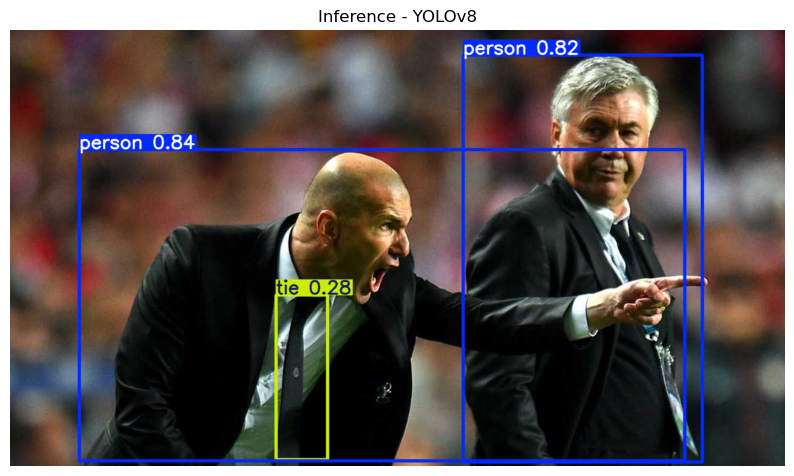

In [16]:
img_result = cv2.imread("result.jpg")
img_rgb = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Inference - YOLOv8")

In [1]:
import cv2
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
    if not success:
        break

    results = model(img, stream=True)

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0])
            cls = int(box.cls[0])
            label = model.names[cls]

            cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,255), 2)
            cv2.putText(
                img,
                f"{label} {conf:.2f}",
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (255,0,255),
                2
            )

    cv2.imshow("Webcam YOLO", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()